# param_estim_4lump.py

The four-lump model involves four subgroups: VGO (y1), gasoline (y2), gas
(y3), and coke (y4). The equations that describe the four-lump
model are:

   
$$\frac{dy_1}{dt}\, = \,-\,(k_{12} + k_{13} + k_{14}){y_1}^2$$

$$\frac{dy_2}{dt}\, = \, k_{12} {y_1}^2 - k_{23}y_2 - k_{24}y_2$$

$$\frac{dy_3}{dt}\, = \, k_{13} {y_1}^2 + k_{23} y_2$$

$$\frac{dy_4}{dt}\, = \, k_{14} {y_1}^2 + k_{24} y_2$$
  
The units and definitions of parameters:

    Time (h)
    y1: VGO weight fraction
    y2: gasoline weight fraction
    y3: gas weight fraction
    y4: gas weight fraction
    convention value: 1 - y1

Author:

     Rui Cai

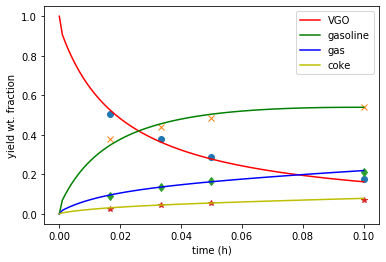

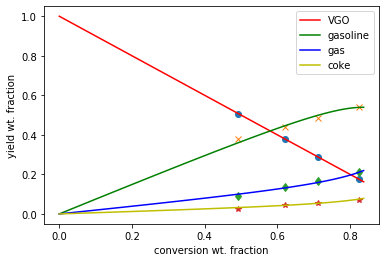

K12 = 38.52204233730372
K13 = 9.877905868525396
K14 = 3.101404781871807
K23 = 1.3133238368194406
K24 = 0.633607673490654


In [10]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Data
xaxisData = np.array( [1/60, 1/30, 1/20, 1/10] ) # time 
yaxisData = np.array( [ [0.5074, 0.3796, 0.2882,0.1762], [0.3767, 0.4385, 0.4865, 0.5416], [0.0885, 0.136,0.1681 ,0.2108], [0.0274,0.0459, 0.0572, 0.0714]] )
conversion = np.array( [0.4926, 0.6204, 0.7118, 0.8238] )
# Guesses for parameters 
k12guess = 0.1; 
k13guess = 0.1; 
k14guess = 0.1; 
k23guess = 0.1; 
k24guess = 0.1; 
parameterGuesses = np.array([k12guess,k13guess,k14guess,k23guess,k24guess])

#Define ODEs 
def ODE_definition(y,t,args): 
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    y4 = y[3]
    k12 = args[0]
    k13 = args[1]
    k14 = args[2]
    k23 = args[3]
    k24 = args[4]
    dy1dt = -(k12+k13+k14)*y1**2
    dy2dt = k12*y1**2 - k23*y2 - k24*y2
    dy3dt = k13*y1**2 + k23*y2
    dy4dt = k14*y1**2 + k24*y2
    return dy1dt, dy2dt, dy3dt, dy4dt
 
def ODEmodel(xaxisData,*params):
    yaxis0 = np.array([1,0,0,0])
    numYaxisVariables = 4 
    yaxisOutput = np.zeros((xaxisData.size,numYaxisVariables)) 
    for i in np.arange(0,len(xaxisData)):
        xaxisIncrement = 0.001 
        xaxisSpan = np.arange(0,xaxisData[i]+xaxisIncrement,xaxisIncrement)
        y_calc = odeint(ODE_definition,yaxis0,xaxisSpan,args=(params,))
        yaxisOutput[i,:]=y_calc[-1,:]
        
    yaxisOutput = np.transpose(yaxisOutput)
    yaxisOutput = np.ravel(yaxisOutput)
    return yaxisOutput

parametersoln, pcov = curve_fit(ODEmodel,xaxisData,np.ravel(yaxisData),p0=parameterGuesses)


plt.figure(1)
plt.plot(xaxisData, yaxisData[0,:],'o') 
plt.plot(xaxisData, yaxisData[1,:],'x') 
plt.plot(xaxisData, yaxisData[2,:],'d')
plt.plot(xaxisData, yaxisData[3,:],'*')
yaxis0 = np.array([100,1])
numYaxisVariables = 4
xforPlotting = np.linspace(0,xaxisData[-1],100) 
y_calculated = ODEmodel(xforPlotting,*parametersoln)
y_calculated = np.reshape(y_calculated,(numYaxisVariables,xforPlotting.size))
line1 =plt.plot(xforPlotting, y_calculated[0,:],'r-',label='VGO') 
line2 =plt.plot(xforPlotting, y_calculated[1,:],'g-',label='gasoline') 
line3 =plt.plot(xforPlotting, y_calculated[2,:],'b-',label='gas') 
line4 =plt.plot(xforPlotting, y_calculated[3,:],'y-',label='coke')
plt.xlabel('time (h)')
plt.ylabel('yield wt. fraction')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(conversion, yaxisData[0,:],'o') 
plt.plot(conversion, yaxisData[1,:],'x') 
plt.plot(conversion, yaxisData[2,:],'d')
plt.plot(conversion, yaxisData[3,:],'*')
yaxis0 = np.array([100,1])
numYaxisVariables = 4
xforPlotting = np.linspace(0,xaxisData[-1],100) 
y_calculated = ODEmodel(xforPlotting,*parametersoln)
y_calculated = np.reshape(y_calculated,(numYaxisVariables,xforPlotting.size))
line1 =plt.plot(1-y_calculated[0,:], y_calculated[0,:],'r-',label='VGO') 
line2 =plt.plot(1-y_calculated[0,:], y_calculated[1,:],'g-',label='gasoline') 
line3 =plt.plot(1-y_calculated[0,:], y_calculated[2,:],'b-',label='gas') 
line4 =plt.plot(1-y_calculated[0,:], y_calculated[3,:],'y-',label='coke')
plt.xlabel('conversion wt. fraction')
plt.ylabel('yield wt. fraction')
plt.legend()
plt.show()

print('K12 =',parametersoln[0])
print('K13 =',parametersoln[1])
print('K14 =',parametersoln[2])
print('K23 =',parametersoln[3])
print('K24 =',parametersoln[4])

Figure 1 The relationship between time (h) and components wt. fraction

Figure 2 The relationship between convension value and components wt. fraction